<a href="https://colab.research.google.com/github/thomas666-u/Camera-autobuild/blob/main/Z_Image_Turbo_4bit_jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U git+https://github.com/huggingface/diffusers git+https://github.com/Disty0/sdnq

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-shgjikef
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-shgjikef
  Resolved https://github.com/huggingface/diffusers to commit 6a1904eb065ba4daad6bfe784cc3064852755acf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/Disty0/sdnq to /tmp/pip-req-build-4y85_vmp
  Running command git clone --filter=blob:none --quiet https://github.com/Disty0/sdnq /tmp/pip-req-build-4y85_vmp
  Resolved https://github.com/Disty0/sdnq to commit 974ad52d296abc4cdbce8af970b8b5b1aa978950
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.37.0.dev0-py3-none-any.whl size=4917908 sha256=c2b3e51870afc457542013e3aa8e504c681a20b75bf

In [2]:
import torch
import diffusers
from sdnq import SDNQConfig # import sdnq to register it into diffusers and transformers
from sdnq.loader import apply_sdnq_options_to_model

pipe = diffusers.ZImagePipeline.from_pretrained("Disty0/Z-Image-Turbo-SDNQ-uint4-svd-r32", torch_dtype=torch.float32, device_map="cuda")
pipe.transformer = apply_sdnq_options_to_model(pipe.transformer, use_quantized_matmul=True)
pipe.text_encoder = apply_sdnq_options_to_model(pipe.text_encoder, use_quantized_matmul=True)

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


model_index.json:   0%|          | 0.00/457 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/487 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/2.84G [00:00<?, ?B/s]

tokenizer/tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

transformer/diffusion_pytorch_model.safe(…):   0%|          | 0.00/3.48G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/backends/cuda/__init__.py:131: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  return torch._C._get_cublas_allow_tf32()
W0130 10:45:18.494000 178 torch/_inductor/utils.py:1558] [2/0] Not enough SMs to use max_autotune_gemm mode


  0%|          | 0/9 [00:00<?, ?it/s]

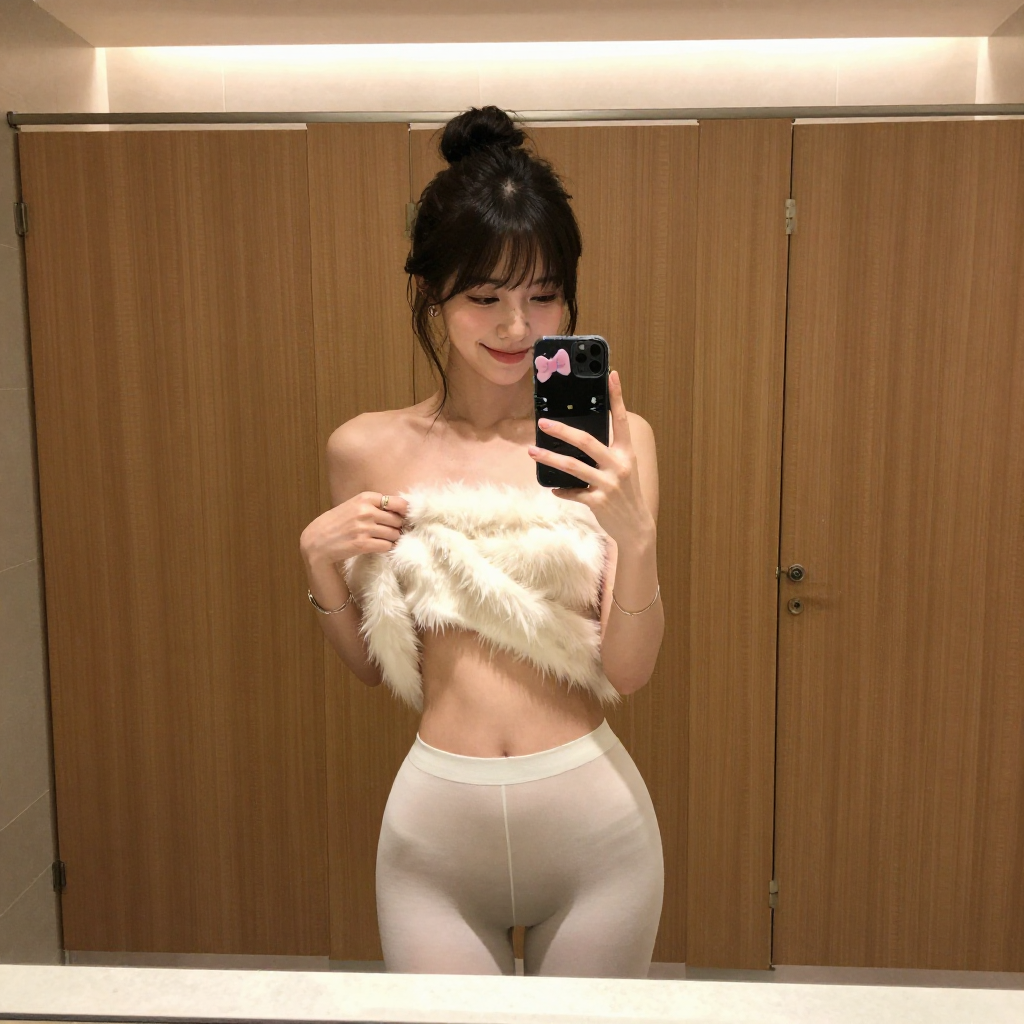

In [4]:
prompt = """
这是一个通过镜子捕捉的时尚卫生间更衣区场景，整体氛围害羞而自信，充满舒适温馨的“感性”美学。环境以温暖的木质层压隔间门和柔和的台面反射为特点，灯光由天花板LED营造温暖氛围，并利用镜子添加微妙的前部补光以提亮眼窝，同时保持逼真自然的镜面高光。

在审美上，追求正宗的智能手机镜面自拍风格，画面呈现温暖的内部色彩、柔和的滚动感、最小的颗粒度以及胶片般的柔和对比。

拍摄主题为一位东亚（韩国）成年女性，身材苗条娇小，腰部线条清晰。她将头发梳成凌乱的发髻，配有丰满的刘海，侧边散落几缕发丝，妆容自然水润，保留肌肤真实纹理。姿势采用站立式镜子自拍，带着温柔的闭唇微笑，左手轻轻提起衣物褶边，右手握住手机。构图采用3:4垂直画幅、腰部以上取景，摄像机角度略微向下，腹部可见。

着装方面，上身不穿衣服，下身为白色丝袜。配饰包括细手镯、戒指、精致的环形耳环，以及一部带有黑色猫咪外壳和粉色蝴蝶结的智能手机（Hello-Kitty风格）。

场景道具包含背景中垂直的木纹隔间门（隐约可见金属铰链）以及台面，需确保所有边缘反射柔和逼真。

相机技术要求正确的镜像反转，保持自然身体比例，避免出现重复的手机或手部影像。使用智能手机广角镜头（约24–26mm等效焦距），f/1.8光圈效果，ISO约250，快门速度1/125秒，白平衡设置在4200–4400K。构图主体居中且略微倾斜，保持毛发纹理清晰，手机和手部姿势自然。后期修图仅清洁轻微瑕疵，保留织物微褶和毛皮纤维，避免晕染效果。需注意避免扭曲的门、沉重的暗角、过度锐化、卡通化的平滑处理以及任何文字或水印。
"""
image = pipe(
    prompt=prompt,
    height=1024,
    width=1024,
    num_inference_steps=9,
    guidance_scale=0.0,
    generator=torch.manual_seed(42),
).images[0]
display(image)